<a href="https://colab.research.google.com/github/BharathiUppalapati/Investigating-the-collaboration-of-XAI-algorithms/blob/main/Investigating_the_collaboration_of_XAI_algorithms_and_vision_transformers_for_Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install shap
import shap
import zipfile

# Move kaggle.json to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download APTOS Blindness Detection dataset
!kaggle competitions download -c aptos2019-blindness-detection

# Unzip the downloaded dataset
with zipfile.ZipFile("aptos2019-blindness-detection.zip", "r") as zip_ref:
    zip_ref.extractall("aptos2019-blindness-detection")

... resuming from 815792128 bytes (9399497747 bytes left) ...
100% 9.51G/9.51G [07:58<00:00, 21.6MB/s]
100% 9.51G/9.51G [07:58<00:00, 19.6MB/s]


In [ ]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Define paths to dataset
data_dir = "aptos2019-blindness-detection/train_images"
labels_file = "aptos2019-blindness-detection/train.csv"

# Load labels
labels_df = pd.read_csv(labels_file)

# Preprocess data
def preprocess_data(img_path, label):
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array, label

# Load and preprocess images
data = []
for index, row in labels_df.iterrows():
    img_path = os.path.join(data_dir, row['id_code'] + ".png")
    label = row['diagnosis']
    img_array, label = preprocess_data(img_path, label)
    data.append((img_array, label))

# Split data into features and labels
X = np.array([entry[0] for entry in data])
y = np.array([entry[1] for entry in data])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load VGG16 base model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Define a learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model with Adam optimizer and learning rate scheduler
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

# ... (rest of the code)

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)
# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

Epoch 1/10
74/74 [==============================] - 11s 58ms/step - loss: 1.9005 - accuracy: 0.5348 - val_loss: 0.8379 - val_accuracy: 0.7082
Epoch 2/10
74/74 [==============================] - 2s 31ms/step - loss: 0.9205 - accuracy: 0.6650 - val_loss: 0.8263 - val_accuracy: 0.7201
Epoch 3/10
74/74 [==============================] - 2s 30ms/step - loss: 0.8824 - accuracy: 0.6893 - val_loss: 0.7890 - val_accuracy: 0.7099
Epoch 4/10
74/74 [==============================] - 2s 30ms/step - loss: 0.8797 - accuracy: 0.6974 - val_loss: 0.7724 - val_accuracy: 0.7150
Epoch 5/10
74/74 [==============================] - 2s 30ms/step - loss: 0.8508 - accuracy: 0.6991 - val_loss: 0.7620 - val_accuracy: 0.7201
Epoch 6/10
74/74 [==============================] - 2s 30ms/step - loss: 0.8487 - accuracy: 0.6953 - val_loss: 0.7899 - val_accuracy: 0.7099
Epoch 7/10
74/74 [==============================] - 2s 31ms/step - loss: 0.8393 - accuracy: 0.7034 - val_loss: 0.7627 - val_accuracy: 0.7270
Epoch 8/10
7

In [ ]:
# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 22ms/step
True Label: [0. 0. 0. 1. 0.], Predicted Label: 2
1/1 [==============================] - 0s 21ms/step
True Label: [0. 0. 1. 0. 0.], Predicted Label: 2
1/1 [==============================] - 0s 21ms/step
True Label: [0. 0. 1. 0. 0.], Predicted Label: 2
1/1 [==============================] - 0s 22ms/step
True Label: [1. 0. 0. 0. 0.], Predicted Label: 0
1/1 [==============================] - 0s 21ms/step
True Label: [0. 0. 1. 0. 0.], Predicted Label: 2


In [ ]:
# Split data into train and test sets
EPOCHS=30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

Epoch 1/30
74/74 [==============================] - 8s 51ms/step - loss: 1.9320 - accuracy: 0.4605 - val_loss: 1.4170 - val_accuracy: 0.5137
Epoch 2/30
74/74 [==============================] - 2s 31ms/step - loss: 1.2418 - accuracy: 0.5651 - val_loss: 0.9134 - val_accuracy: 0.6706
Epoch 3/30
74/74 [==============================] - 2s 31ms/step - loss: 0.9922 - accuracy: 0.6492 - val_loss: 1.0430 - val_accuracy: 0.6058
Epoch 4/30
74/74 [==============================] - 2s 31ms/step - loss: 1.0158 - accuracy: 0.6244 - val_loss: 0.8831 - val_accuracy: 0.6962
Epoch 5/30
74/74 [==============================] - 2s 31ms/step - loss: 0.9659 - accuracy: 0.6496 - val_loss: 0.9217 - val_accuracy: 0.6894
Epoch 6/30
74/74 [==============================] - 2s 31ms/step - loss: 0.9335 - accuracy: 0.6594 - val_loss: 0.8477 - val_accuracy: 0.7014
Epoch 7/30
74/74 [==============================] - 2s 31ms/step - loss: 0.9082 - accuracy: 0.6705 - val_loss: 0.9084 - val_accuracy: 0.7031
Epoch 8/30
74

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


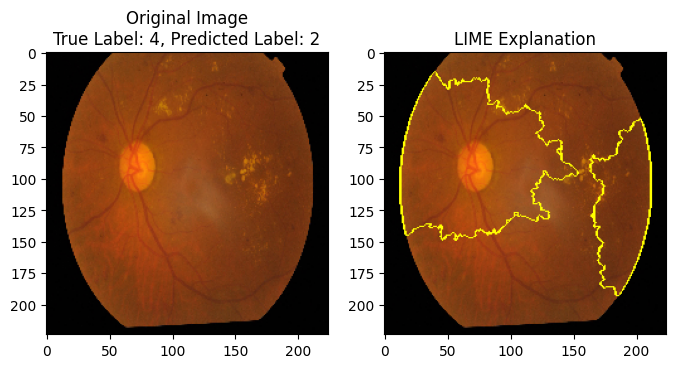

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


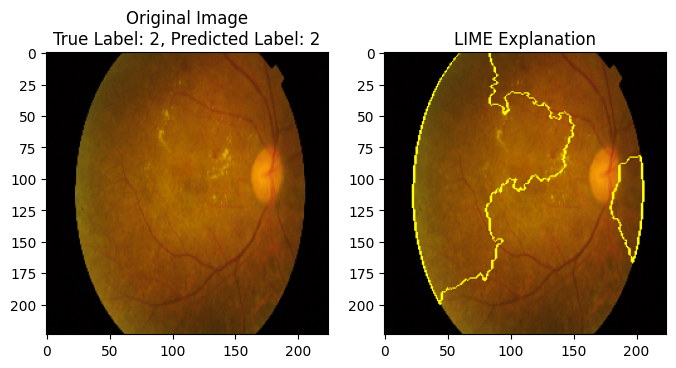

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


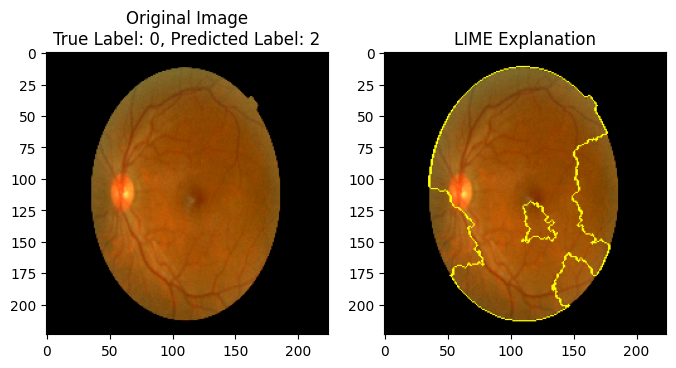

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


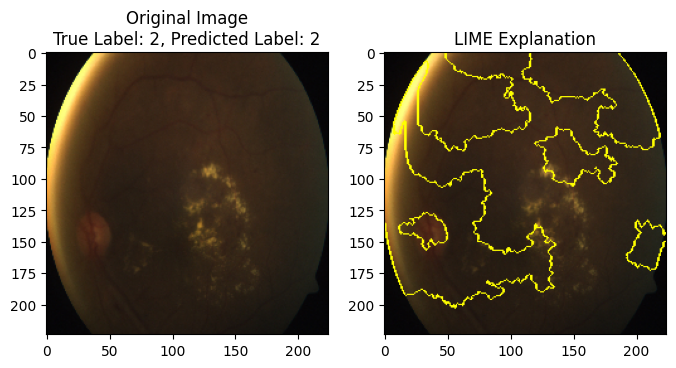

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


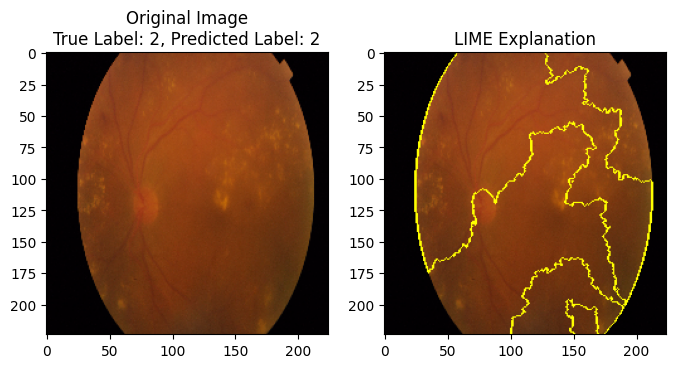

In [ ]:
!pip install lime
# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict(images):
    images = np.array(images)
    return model.predict(images)

for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]

    explanation = explainer.explain_instance(
        image=img,
        classifier_fn=predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000  # Number of perturbed samples to generate
    )

    # Display the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}")

    # Display the image with LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(img, mask))
    plt.title("LIME Explanation")

    plt.show()

In [ ]:
# Split data into train and test sets
EPOCHS=30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model
model = Sequential([
    base_model,
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

Epoch 1/30
74/74 [==============================] - 8s 60ms/step - loss: 5.5836 - accuracy: 0.4430 - val_loss: 1.1552 - val_accuracy: 0.6758
Epoch 2/30
74/74 [==============================] - 3s 39ms/step - loss: 1.0523 - accuracy: 0.6201 - val_loss: 1.2914 - val_accuracy: 0.5034
Epoch 3/30
74/74 [==============================] - 3s 38ms/step - loss: 0.9949 - accuracy: 0.6419 - val_loss: 0.9288 - val_accuracy: 0.6621
Epoch 4/30
74/74 [==============================] - 3s 39ms/step - loss: 0.9121 - accuracy: 0.6752 - val_loss: 0.8647 - val_accuracy: 0.6997
Epoch 5/30
74/74 [==============================] - 3s 38ms/step - loss: 0.9679 - accuracy: 0.6530 - val_loss: 0.8544 - val_accuracy: 0.7065
Epoch 6/30
74/74 [==============================] - 3s 39ms/step - loss: 0.9383 - accuracy: 0.6500 - val_loss: 0.9467 - val_accuracy: 0.6672
Epoch 7/30
74/74 [==============================] - 3s 38ms/step - loss: 0.9116 - accuracy: 0.6688 - val_loss: 0.9846 - val_accuracy: 0.6502
Epoch 8/30
74

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


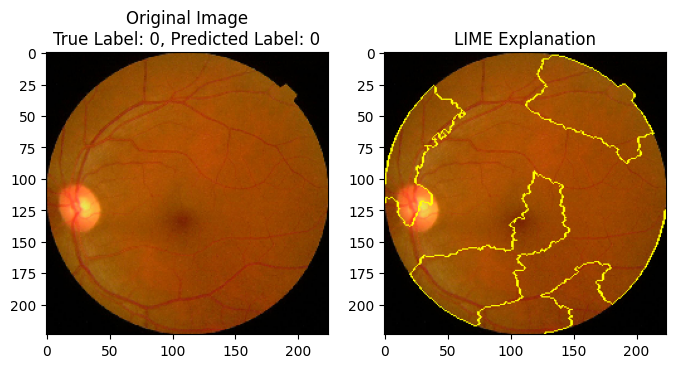

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


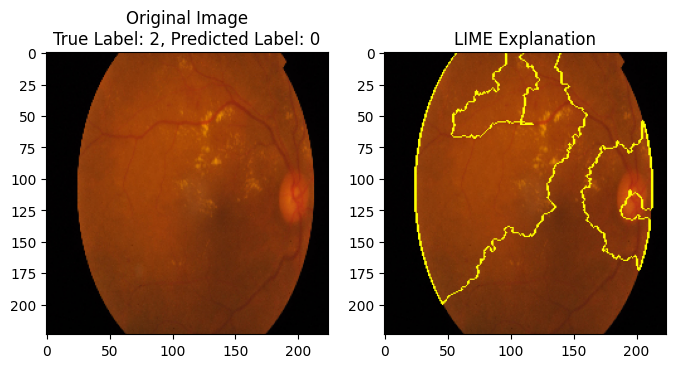

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


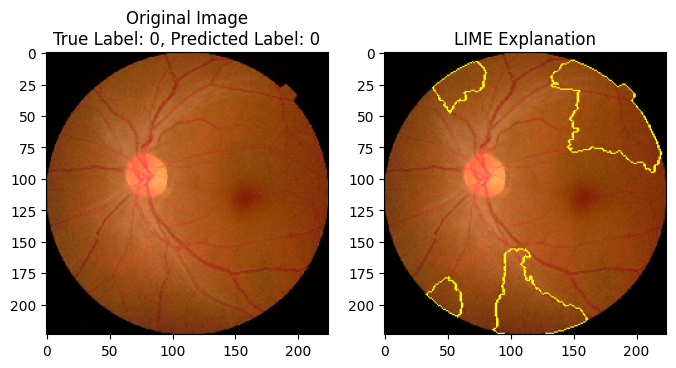

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


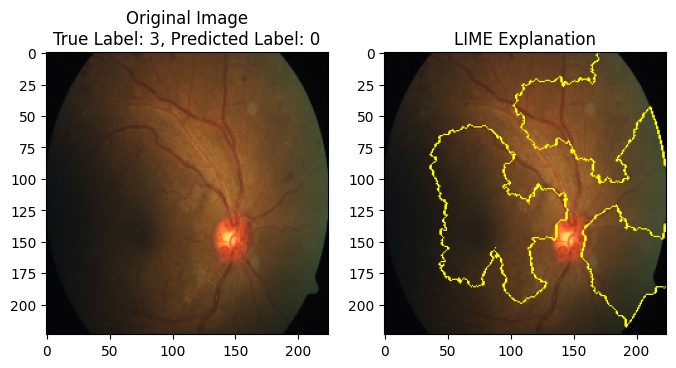

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


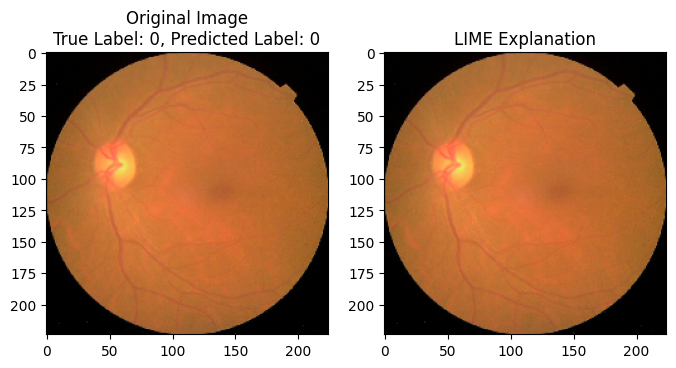

In [ ]:
!pip install lime
# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict(images):
    images = np.array(images)
    return model.predict(images)

for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]

    explanation = explainer.explain_instance(
        image=img,
        classifier_fn=predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000  # Number of perturbed samples to generate
    )

    # Display the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}")

    # Display the image with LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(img, mask))
    plt.title("LIME Explanation")

    plt.show()

In [ ]:
# Split data into train and test sets
EPOCHS=30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from tensorflow.keras.applications import InceptionV3
# Define pretrained model
base_model_1 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom model
model_1 = Sequential([
    base_model_1,
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model_1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

Epoch 1/30
74/74 [==============================] - 46s 132ms/step - loss: 2.8011 - accuracy: 0.5805 - val_loss: 15524.8105 - val_accuracy: 0.3805
Epoch 2/30
74/74 [==============================] - 5s 67ms/step - loss: 0.9591 - accuracy: 0.7000 - val_loss: 1.2385 - val_accuracy: 0.6416
Epoch 3/30
74/74 [==============================] - 5s 67ms/step - loss: 0.7505 - accuracy: 0.7268 - val_loss: 0.7147 - val_accuracy: 0.7355
Epoch 4/30
74/74 [==============================] - 5s 66ms/step - loss: 0.7333 - accuracy: 0.7567 - val_loss: 0.9988 - val_accuracy: 0.6826
Epoch 5/30
74/74 [==============================] - 5s 67ms/step - loss: 0.8425 - accuracy: 0.7204 - val_loss: 174.7880 - val_accuracy: 0.6809
Epoch 6/30
74/74 [==============================] - 5s 67ms/step - loss: 0.6798 - accuracy: 0.7653 - val_loss: 0.6550 - val_accuracy: 0.7628
Epoch 7/30
74/74 [==============================] - 5s 68ms/step - loss: 0.6086 - accuracy: 0.7691 - val_loss: 0.6080 - val_accuracy: 0.7526
Epoch

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


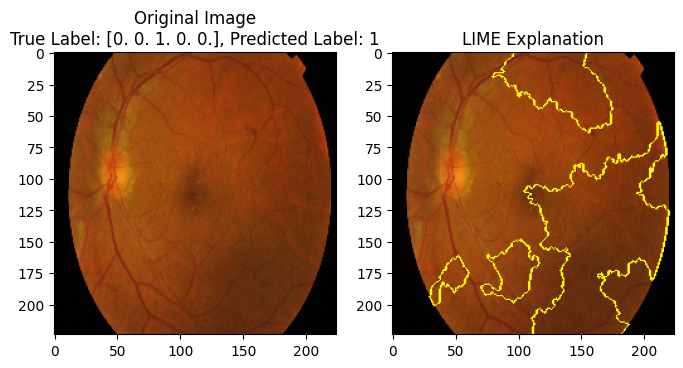

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


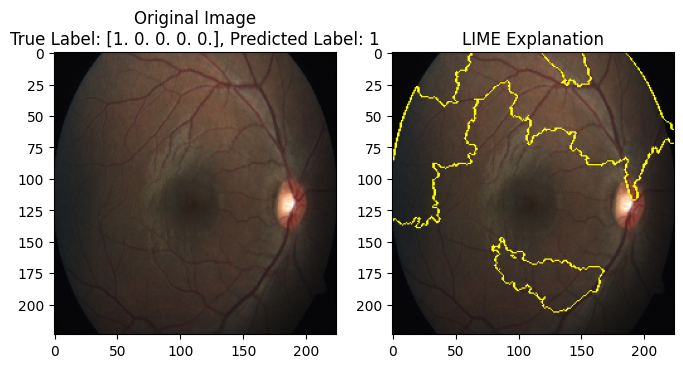

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


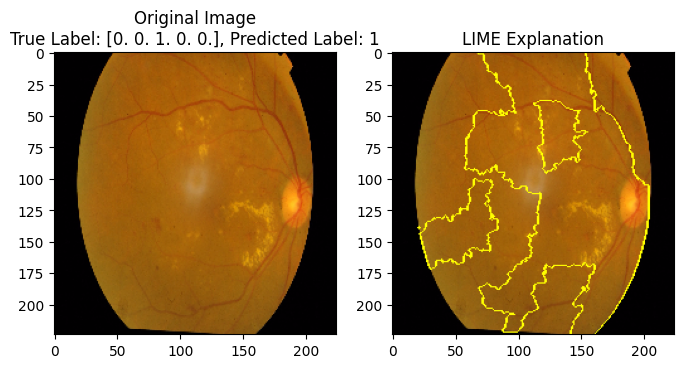

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


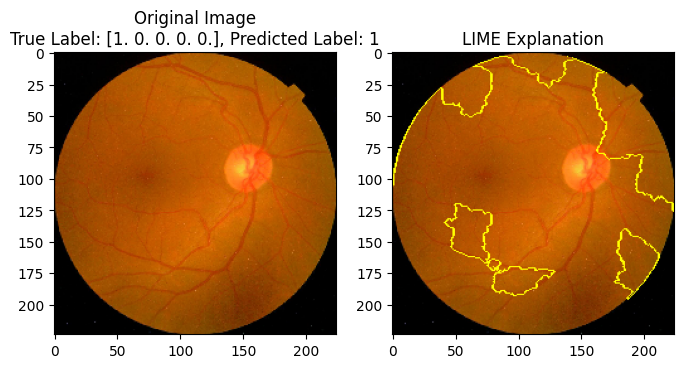

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


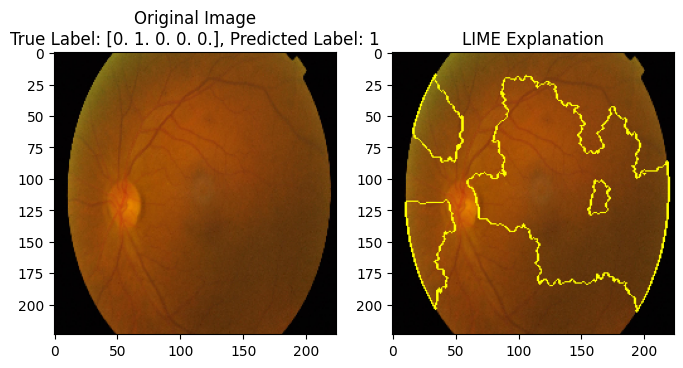

In [ ]:

# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict(images):
    images = np.array(images)
    return model_1.predict(images)

for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]

    explanation = explainer.explain_instance(
        image=img,
        classifier_fn=predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000  # Number of perturbed samples to generate
    )

    # Display the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}")

    # Display the image with LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(img, mask))
    plt.title("LIME Explanation")

    plt.show()

Epoch 1/30
74/74 [==============================] - 6s 32ms/step - loss: 1.2718 - accuracy: 0.5873 - val_loss: 0.9223 - val_accuracy: 0.6724
Epoch 2/30
74/74 [==============================] - 1s 16ms/step - loss: 0.8705 - accuracy: 0.6837 - val_loss: 0.8482 - val_accuracy: 0.6724
Epoch 3/30
74/74 [==============================] - 1s 15ms/step - loss: 0.8238 - accuracy: 0.6825 - val_loss: 0.8104 - val_accuracy: 0.6962
Epoch 4/30
74/74 [==============================] - 1s 16ms/step - loss: 0.8093 - accuracy: 0.6914 - val_loss: 0.8186 - val_accuracy: 0.6997
Epoch 5/30
74/74 [==============================] - 1s 16ms/step - loss: 0.8058 - accuracy: 0.6974 - val_loss: 0.8616 - val_accuracy: 0.6826
Epoch 6/30
74/74 [==============================] - 1s 15ms/step - loss: 0.8246 - accuracy: 0.6910 - val_loss: 0.8234 - val_accuracy: 0.7014
Epoch 7/30
74/74 [==============================] - 1s 15ms/step - loss: 0.7943 - accuracy: 0.7038 - val_loss: 0.8147 - val_accuracy: 0.6826
Epoch 8/30
74

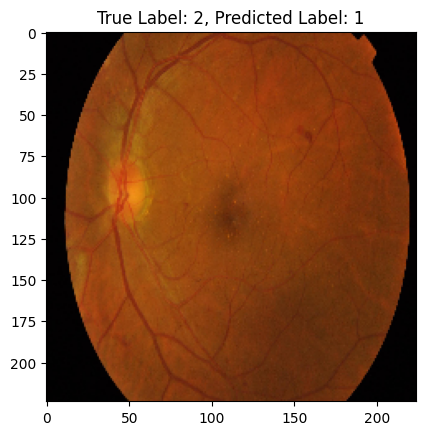

1/1 [==============================] - 0s 21ms/step


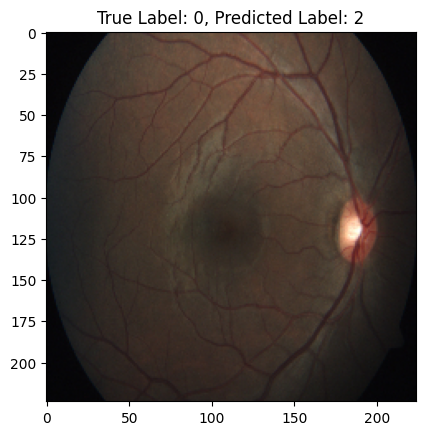

1/1 [==============================] - 0s 21ms/step


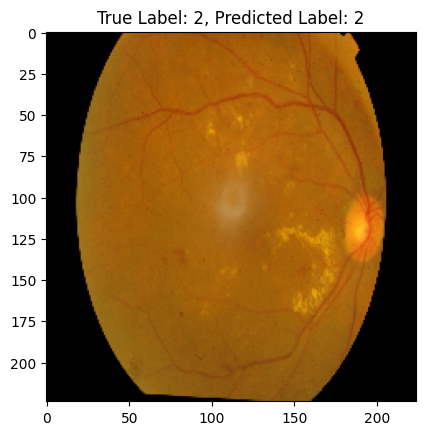

1/1 [==============================] - 0s 21ms/step


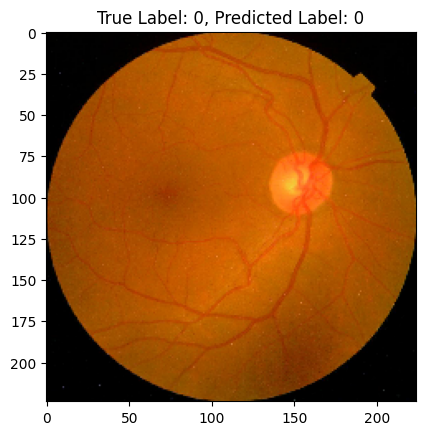

1/1 [==============================] - 0s 22ms/step


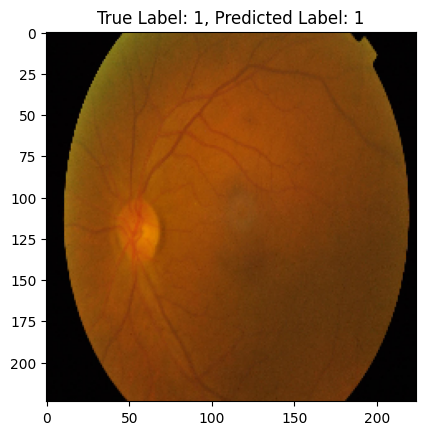

In [ ]:
import tensorflow as tf
num_classes=5
y = tf.keras.utils.to_categorical(y, num_classes)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
EPOCHS = 30
BATCH_SIZE = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build custom AlexNet model
model_alexnet = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_alexnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_alexnet = model_alexnet.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss_alexnet, accuracy_alexnet = model_alexnet.evaluate(X_test, y_test)
print(f"AlexNet Test Accuracy: {accuracy_alexnet}")
print(f"AlexNet Test Loss: {loss_alexnet}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model_alexnet.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


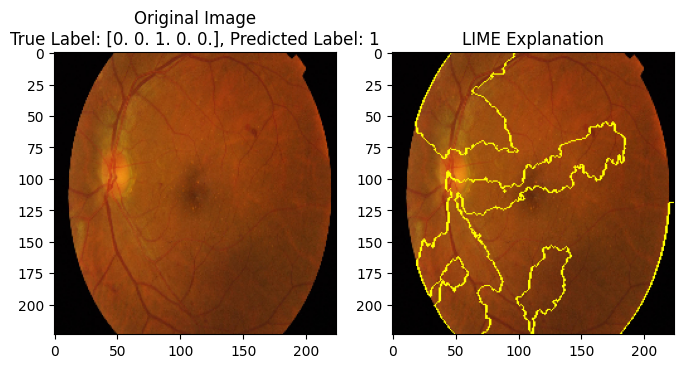

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


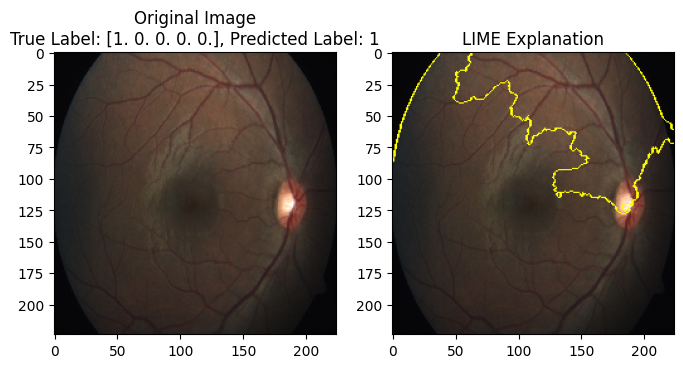

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


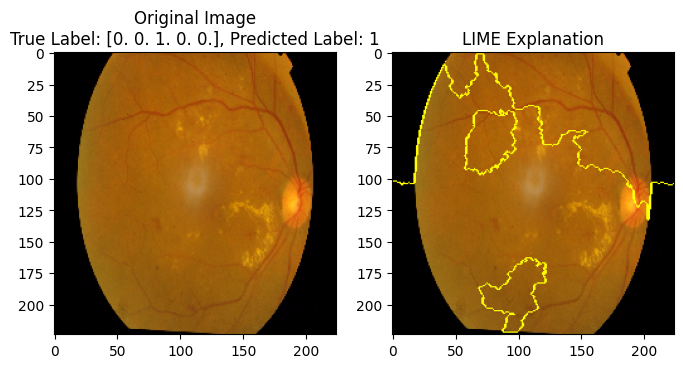

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


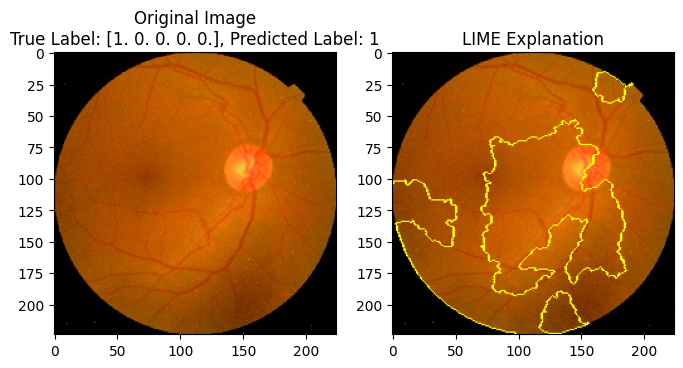

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


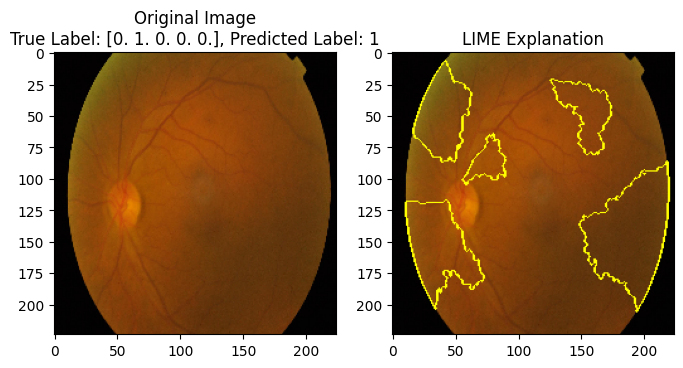

In [ ]:
!pip install lime
# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict(images):
    images = np.array(images)
    return model_alexnet.predict(images)

for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]

    explanation = explainer.explain_instance(
        image=img,
        classifier_fn=predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000  # Number of perturbed samples to generate
    )

    # Display the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}")

    # Display the image with LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(img, mask))
    plt.title("LIME Explanation")

    plt.show()

Epoch 1/30
74/74 [==============================] - 9s 53ms/step - loss: 11.8940 - accuracy: 0.5041 - val_loss: 1.0450 - val_accuracy: 0.5512
Epoch 2/30
74/74 [==============================] - 2s 29ms/step - loss: 1.1735 - accuracy: 0.6236 - val_loss: 0.8334 - val_accuracy: 0.7167
Epoch 3/30
74/74 [==============================] - 2s 29ms/step - loss: 0.9481 - accuracy: 0.6628 - val_loss: 0.8818 - val_accuracy: 0.6877
Epoch 4/30
74/74 [==============================] - 2s 29ms/step - loss: 0.8772 - accuracy: 0.6850 - val_loss: 0.7511 - val_accuracy: 0.7440
Epoch 5/30
74/74 [==============================] - 2s 30ms/step - loss: 0.8406 - accuracy: 0.6876 - val_loss: 0.7187 - val_accuracy: 0.7321
Epoch 6/30
74/74 [==============================] - 2s 29ms/step - loss: 0.8251 - accuracy: 0.7012 - val_loss: 0.7172 - val_accuracy: 0.7372
Epoch 7/30
74/74 [==============================] - 2s 29ms/step - loss: 0.8118 - accuracy: 0.7128 - val_loss: 0.7317 - val_accuracy: 0.7355
Epoch 8/30
7

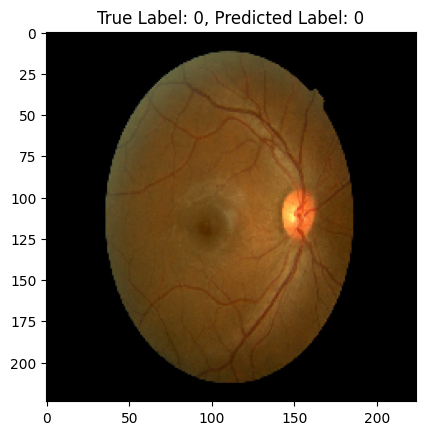

1/1 [==============================] - 0s 29ms/step


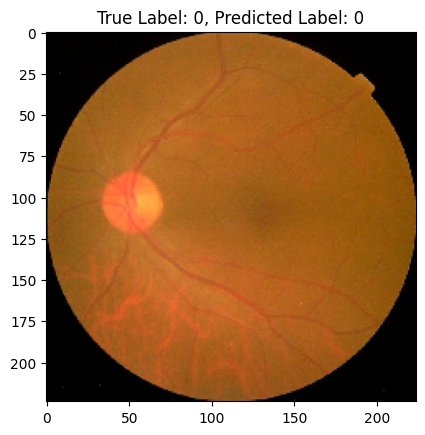

1/1 [==============================] - 0s 27ms/step


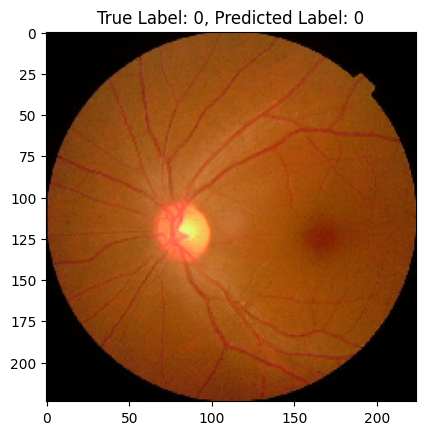

1/1 [==============================] - 0s 28ms/step


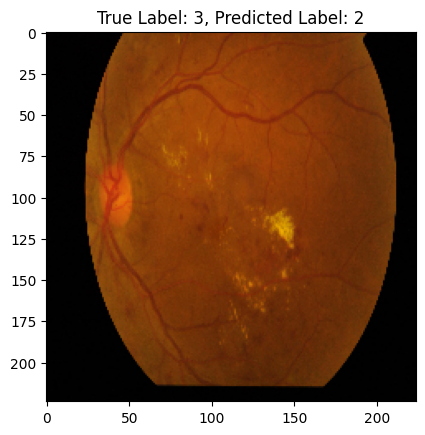

1/1 [==============================] - 0s 29ms/step


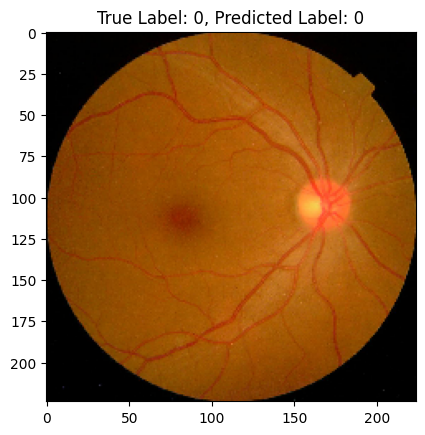

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Define pretrained model
base_model_googlenet = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model_googlenet.layers:
    layer.trainable = False

# Build custom model
model_googlenet = Sequential([
    base_model_googlenet,
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),  # Adding dropout to prevent overfitting
    Dense(1024, activation='relu'),
    Dropout(0.5),  # Adding dropout to prevent overfitting
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model_googlenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_googlenet = model_googlenet.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

# Evaluate the model
loss_googlenet, accuracy_googlenet = model_googlenet.evaluate(X_test, y_test)
print(f"GoogLeNet (InceptionV3) Test Accuracy: {accuracy_googlenet}")
print(f"GoogLeNet (InceptionV3) Test Loss: {loss_googlenet}")

# Display 5 random images with predictions
random_indices = random.sample(range(len(X_test)), 5)
for idx in random_indices:
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model_googlenet.predict(img_expanded)
    predicted_label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


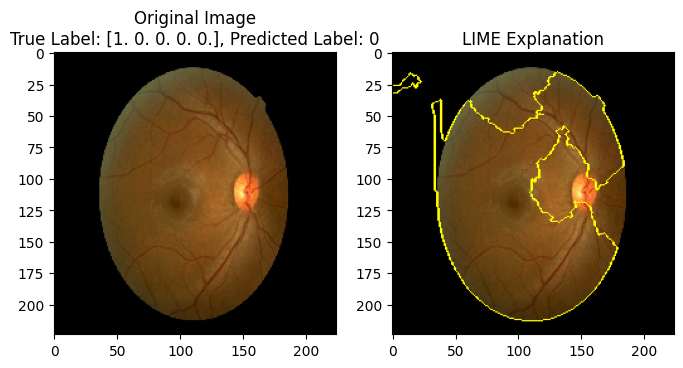

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


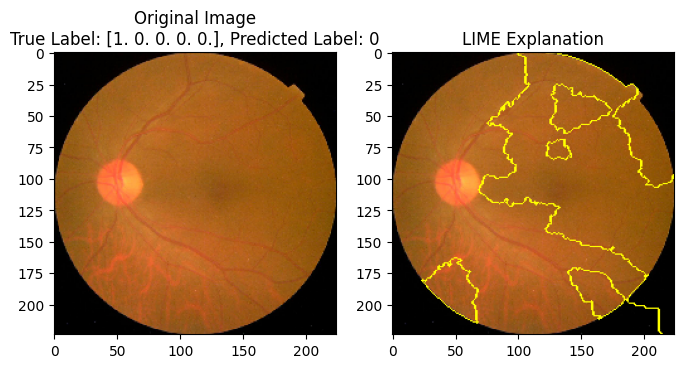

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


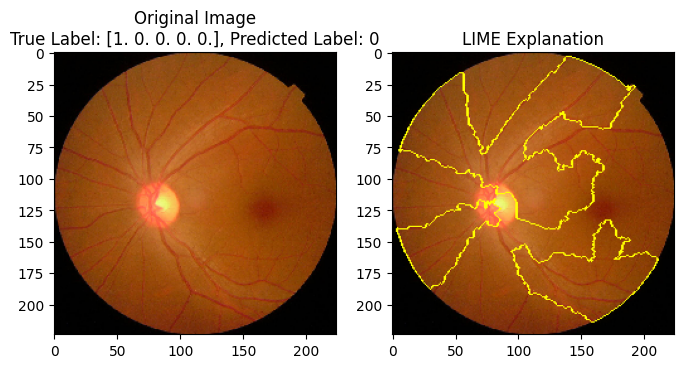

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


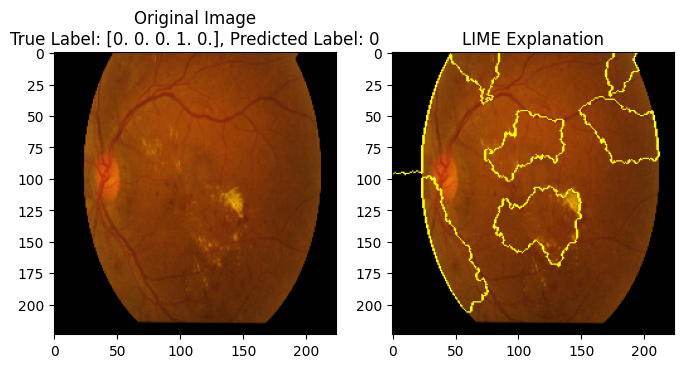

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


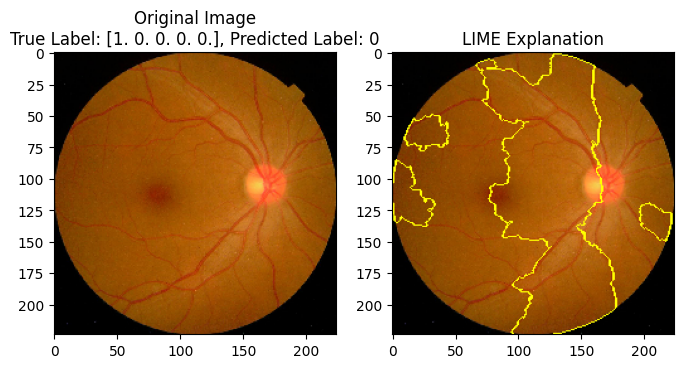

In [ ]:

# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict(images):
    images = np.array(images)
    return model_googlenet.predict(images)

for idx in random_indices:
    img = X_test[idx]
    true_label = y_test[idx]

    explanation = explainer.explain_instance(
        image=img,
        classifier_fn=predict,
        top_labels=5,
        hide_color=0,
        num_samples=1000  # Number of perturbed samples to generate
    )

    # Display the explanation for the top predicted label
    temp, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}")

    # Display the image with LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(img, mask))
    plt.title("LIME Explanation")

    plt.show()

In [ ]:
!pip install torch torchvision transformers pandas lime


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=5)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Load the dataset
df = pd.read_csv('aptos2019-blindness-detection/train.csv')

# Split the dataset into train and validation
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Custom Dataset Class
class APTOSDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.dataframe.iloc[idx, 0] + '.png')
        image = Image.open(img_name).convert("RGB")
        label = self.dataframe.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create Dataset and DataLoader
train_dataset = APTOSDataset(train_df, 'aptos2019-blindness-detection/train_images', transform=transform)
val_dataset = APTOSDataset(val_df, 'aptos2019-blindness-detection/train_images', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Define optimizer and loss function
optimizer = Adam(model.parameters(), lr=3e-5)
criterion = CrossEntropyLoss()

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {train_loss/len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {correct/total}")

  0%|          | 0/184 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 184/184 [06:29<00:00,  2.12s/it]


Epoch 1, Loss: 0.7969942268632029
Validation Loss: 0.6291248992733334, Accuracy: 0.7899045020463847


100%|██████████| 184/184 [06:28<00:00,  2.11s/it]


Epoch 2, Loss: 0.5360279451731754
Validation Loss: 0.5573677877369134, Accuracy: 0.8035470668485676


100%|██████████| 184/184 [06:28<00:00,  2.11s/it]


Epoch 3, Loss: 0.43185853929785284
Validation Loss: 0.5000542016780894, Accuracy: 0.8308321964529332


100%|██████████| 184/184 [06:28<00:00,  2.11s/it]


Epoch 4, Loss: 0.3351596454563348
Validation Loss: 0.5064266890935276, Accuracy: 0.8308321964529332


100%|██████████| 184/184 [06:29<00:00,  2.12s/it]


Epoch 5, Loss: 0.2596326620601442
Validation Loss: 0.4987118781908699, Accuracy: 0.8335607094133697


100%|██████████| 184/184 [06:30<00:00,  2.12s/it]


Epoch 6, Loss: 0.18393547230136945
Validation Loss: 0.5376273353138695, Accuracy: 0.8403819918144612


100%|██████████| 184/184 [06:30<00:00,  2.12s/it]


Epoch 7, Loss: 0.11752597481498252
Validation Loss: 0.5509039370909982, Accuracy: 0.8390177353342428


100%|██████████| 184/184 [06:31<00:00,  2.13s/it]


Epoch 8, Loss: 0.08095205419332437
Validation Loss: 0.6751570484965391, Accuracy: 0.8035470668485676


100%|██████████| 184/184 [06:31<00:00,  2.13s/it]


Epoch 9, Loss: 0.08282010438447089
Validation Loss: 0.6638075462340013, Accuracy: 0.8090040927694406


100%|██████████| 184/184 [06:30<00:00,  2.12s/it]


Epoch 10, Loss: 0.08316470399681154
Validation Loss: 0.6801500976409601, Accuracy: 0.8049113233287858


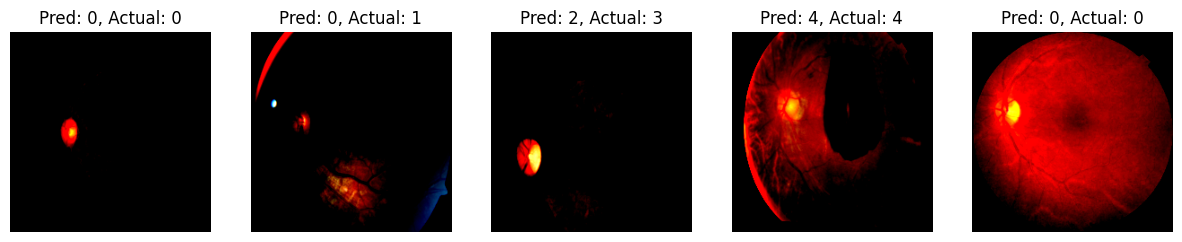

In [ ]:
import torch
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Variables to store images and labels for display
images_to_show = []
predicted_labels = []
actual_labels = []

# Disable gradient calculation for validation
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images).logits
        _, predicted = torch.max(outputs.data, 1)

        # Collect images and labels for display
        if len(images_to_show) < 5:
            for i in range(images.size(0)):
                if len(images_to_show) < 5:
                    images_to_show.append(images[i].cpu())
                    predicted_labels.append(predicted[i].cpu())
                    actual_labels.append(labels[i].cpu())

# Display images with predicted and actual labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (img, pred, actual) in enumerate(zip(images_to_show, predicted_labels, actual_labels)):
    ax = axes[i]
    ax.imshow(img.permute(1, 2, 0))  # Assuming images are in CHW format
    ax.set_title(f"Pred: {pred}, Actual: {actual}")
    ax.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

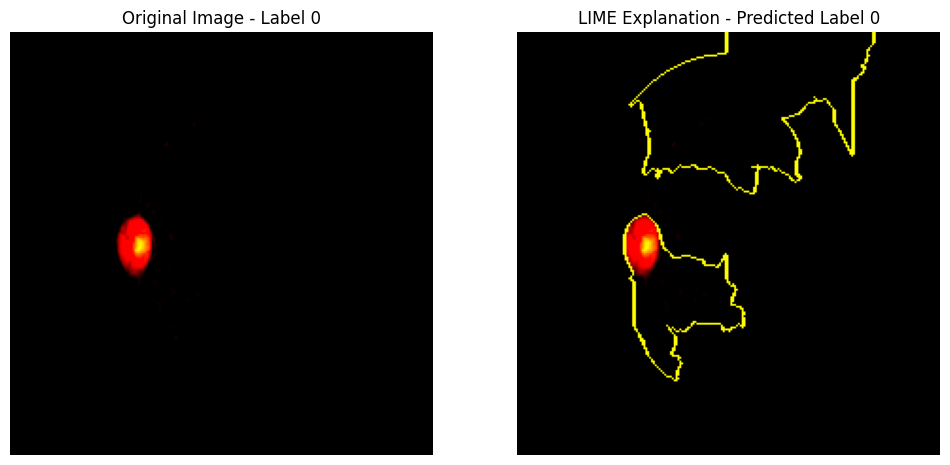

  0%|          | 0/1000 [00:00<?, ?it/s]

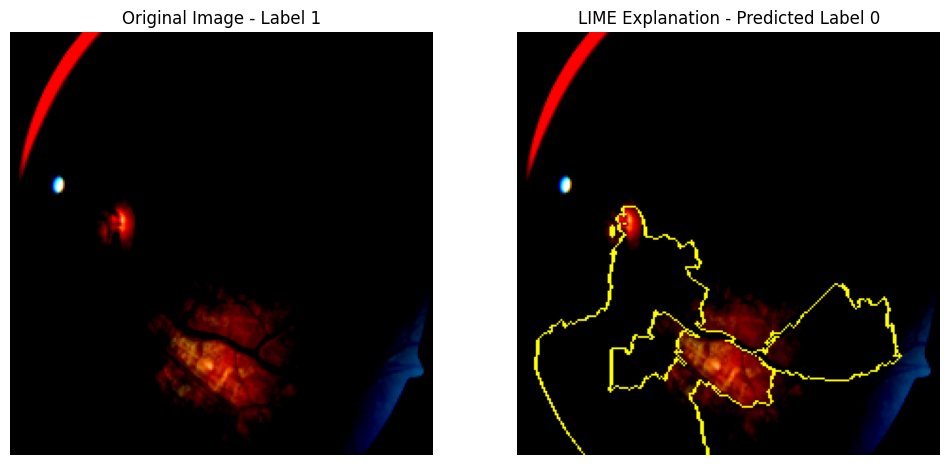

  0%|          | 0/1000 [00:00<?, ?it/s]

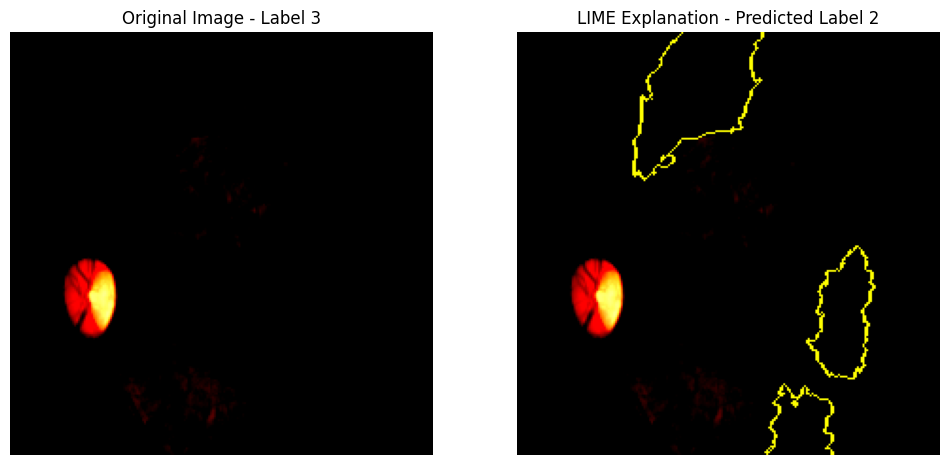

  0%|          | 0/1000 [00:00<?, ?it/s]

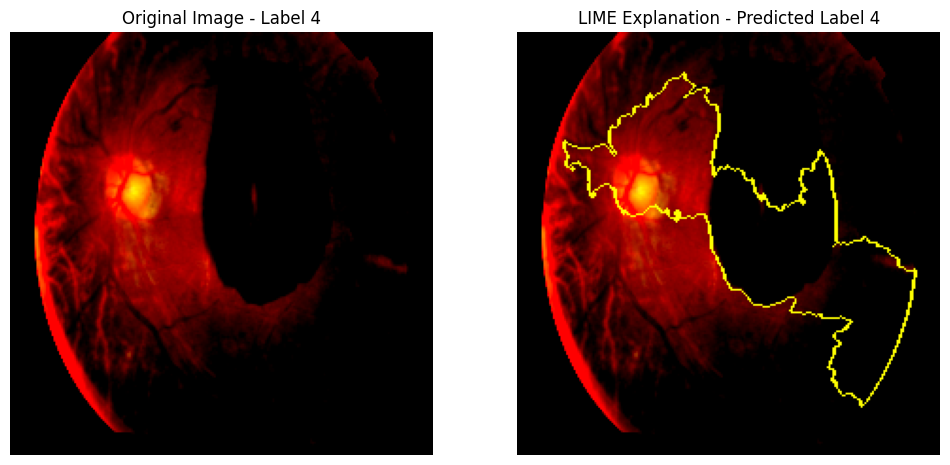

  0%|          | 0/1000 [00:00<?, ?it/s]

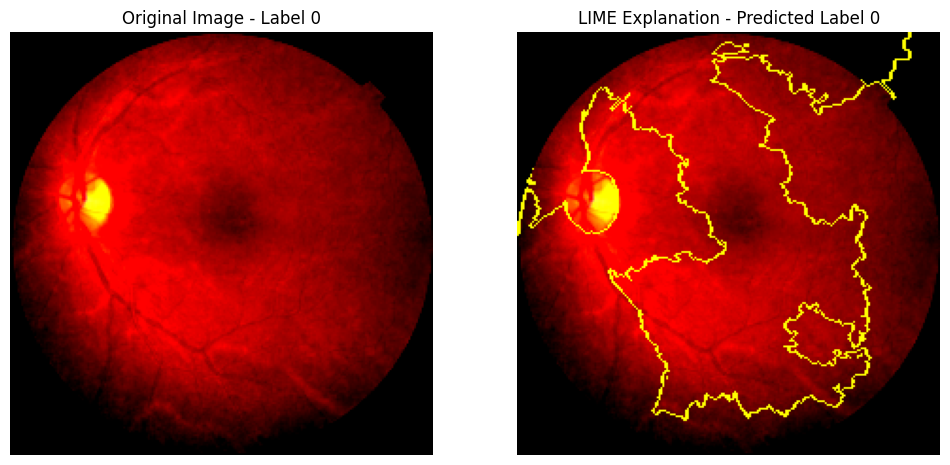

  0%|          | 0/1000 [00:00<?, ?it/s]

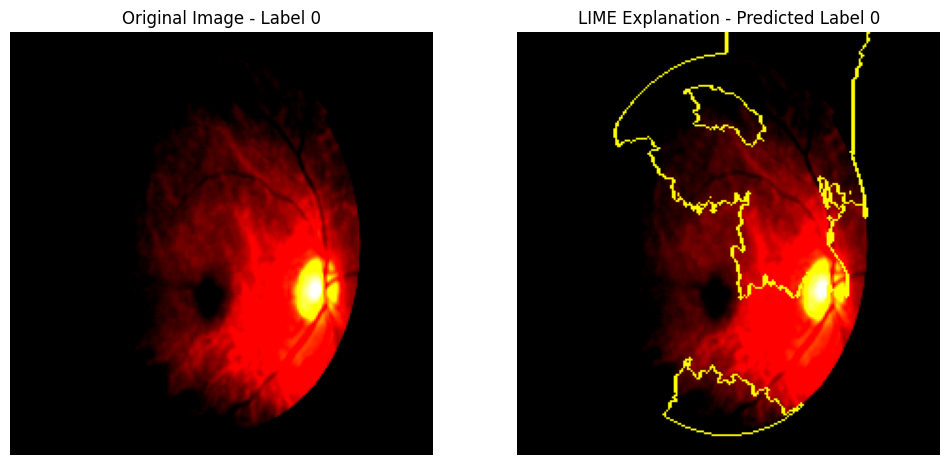

  0%|          | 0/1000 [00:00<?, ?it/s]

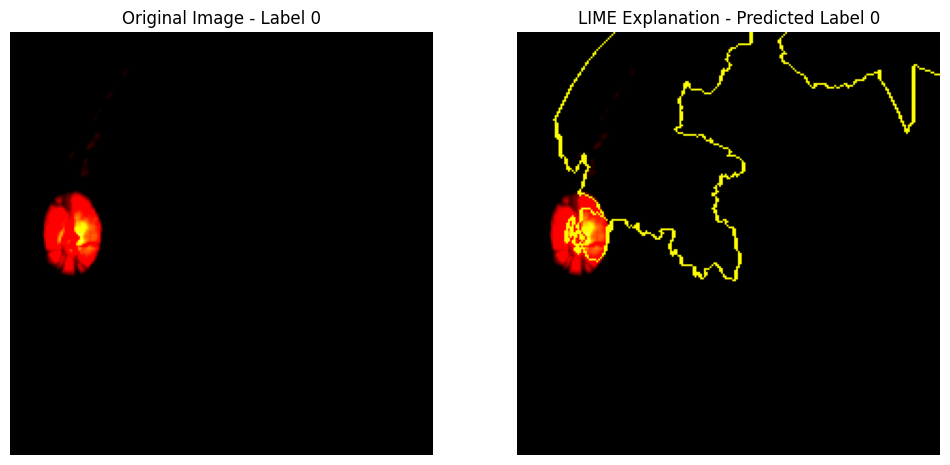

  0%|          | 0/1000 [00:00<?, ?it/s]

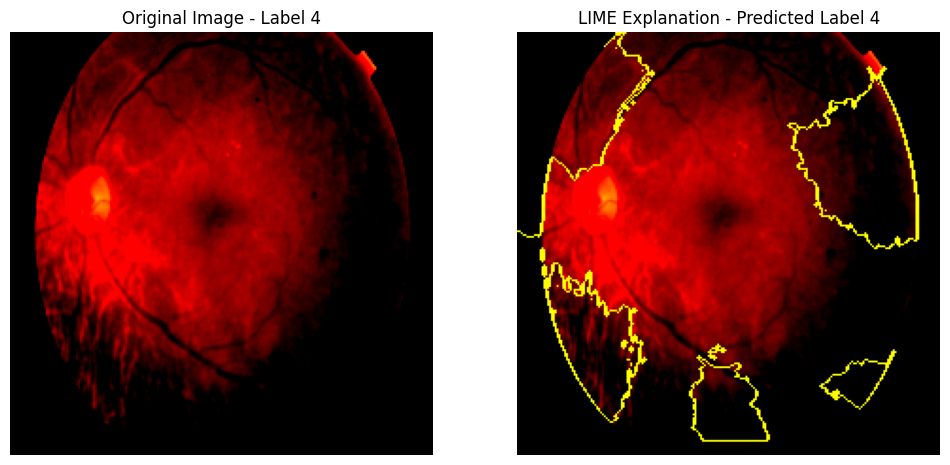

  0%|          | 0/1000 [00:00<?, ?it/s]

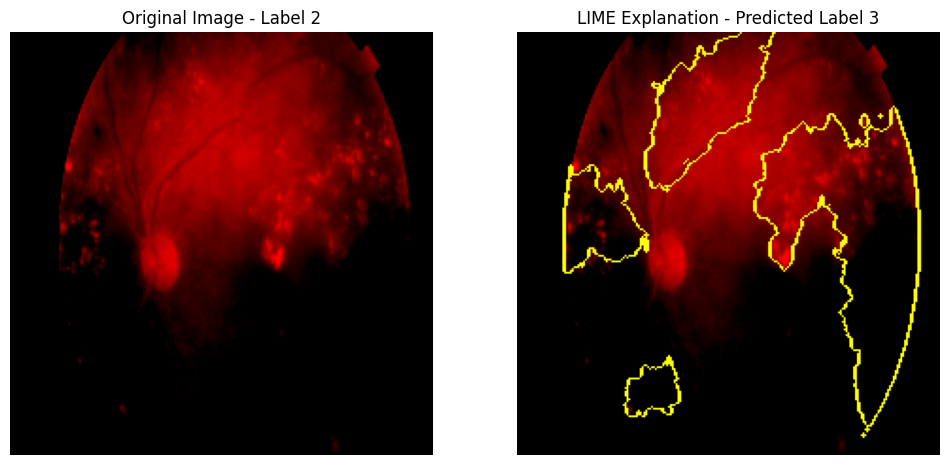

  0%|          | 0/1000 [00:00<?, ?it/s]

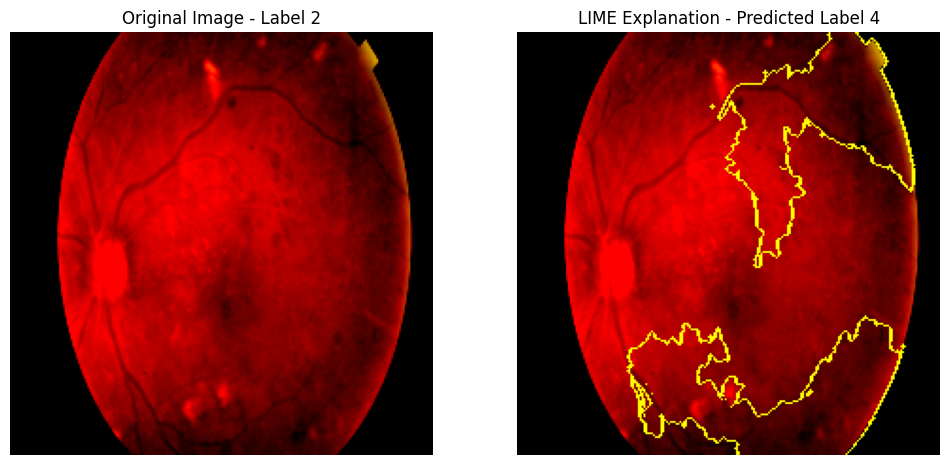

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Define prediction functions
def predict(images):
    model.eval()
    images = torch.stack([torch.tensor(image).permute(2, 0, 1).float() for image in images]).to(device)
    outputs = model(images).logits
    return outputs.detach().cpu().numpy()

def batch_predict(images):
    return predict(images)

explainer = lime_image.LimeImageExplainer()

for i in range(10):  # Explain the first 10 images in the validation set
    image, label = val_loader.dataset[i]
    image_np = image.permute(1, 2, 0).numpy()

    explanation = explainer.explain_instance(image_np, batch_predict, top_labels=1, hide_color=0, num_samples=1000)

    top_label = explanation.top_labels[0]  # Get the top predicted label
    temp, mask = explanation.get_image_and_mask(top_label, positive_only=True, num_features=5, hide_rest=False)

    # Blend the original image with the LIME mask
    img_boundry1 = mark_boundaries(image_np, mask)

    # Plot original image with LIME highlights
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image_np)
    ax[0].set_title(f'Original Image - Label {label}')
    ax[0].axis('off')

    ax[1].imshow(img_boundry1)
    ax[1].set_title(f'LIME Explanation - Predicted Label {top_label}')
    ax[1].axis('off')

    plt.show()
